#Importando o DataSet

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


Pode-se remover as colunas: 'RowNumber', 'CustomerId', 'Surname'

In [ ]:
#Removendo as colunas sem poder preditivo:
df.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
#Dados duplicados:
df.duplicated().sum()

123

In [ ]:
df.drop_duplicates(inplace=True)

#Análise exploratória:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited', axis=1), df['Exited'], test_size=0.6, random_state=42, stratify=df['Exited'])

In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)

##Histogramas

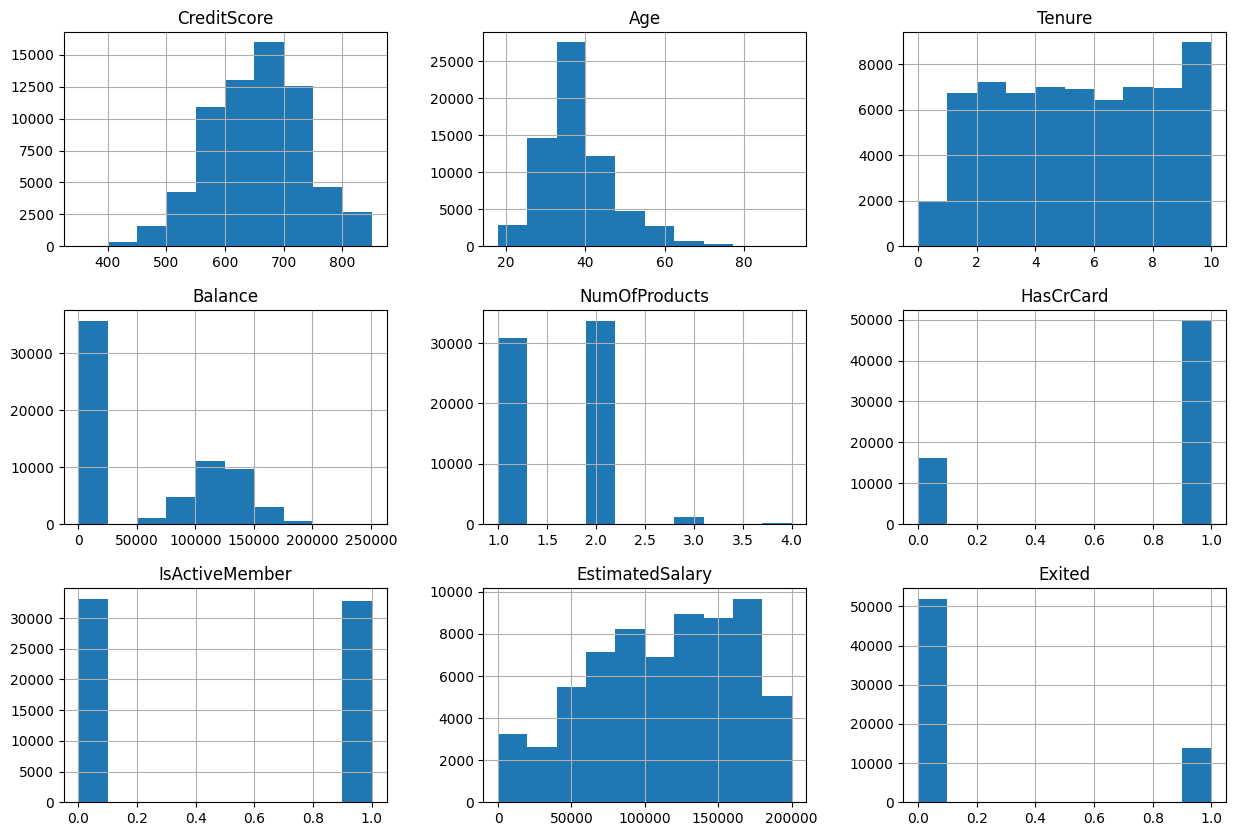

In [ ]:
df_train.hist(figsize=(15,10));

In [ ]:
df_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,65964.000000,65964.000000,65964.000000,65964.000000,65964.000000,65964.000000,65964.000000,65964.000000,65964.000000
mean,656.450033,38.095300,5.009505,55724.771181,1.555424,0.754790,0.497044,112669.367550,0.211691
std,79.995541,8.861969,2.801151,62922.934050,0.547134,0.430215,0.499995,50328.592786,0.408510
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74838.625000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,120135.452500,2.000000,1.000000,1.000000,155700.270000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


##Features vs Exited

In [ ]:
import seaborn as sns

###CreditScore:

####BoxPlot

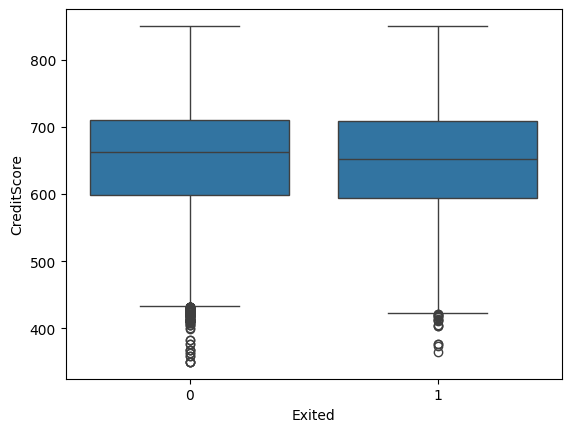

In [ ]:
sns.boxplot(x='Exited', y='CreditScore', data=df_train);

Visualmente, CreditScore não é relevante para distinguir se o cliente vai sair ou não.

####Teste Mann-Whitney

H0: Não há diferença estatísticamente significante entre as amostras (Exited=0 e Exited=1).

H1: Há diferença estatísticamente significante entre as amostras(Exited=0 e Exited=1).

In [ ]:
df_CreditScore_0 = df_train[df_train['Exited'] == 0]['CreditScore']
df_CreditScore_1 = df_train[df_train['Exited'] == 1]['CreditScore']

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
def mannwhitneyu_test(amostra_1, amostra_2, significancia):
  '''
  Essa função retorna o p_value e o resultado do teste.
  amostra_1: Amostra com clientes que não sairam.
  amostra_2: Amostra com clientes que sairam.
  significancia: probabilidade de erro.
  '''
  # Realizar o teste Mann-Whitney
  _, p_valor = mannwhitneyu(amostra_1, amostra_2)
  print(f'p-valor: {p_valor}')
  if p_valor <= significancia:
    print('Rejeitar H0. Há diferença significativa entre as amostras.')
  else:
    print('Aceitar H0. Não há diferença significativa entre as amostras.')

In [ ]:
mannwhitneyu_test(df_CreditScore_0, df_CreditScore_1, 0.05)

p-valor: 1.3000007354954265e-12
Rejeitar H0. Há diferença significativa entre as amostras.


###Coeficiente de variação

In [ ]:
media_credit_score = df_train['CreditScore'].mean()
desvio_padrao_credit_score = df_train['CreditScore'].std()
cv_credit_score = desvio_padrao_credit_score / media_credit_score
cv_credit_score

0.12186082187939516

###Age:

####BoxPlot

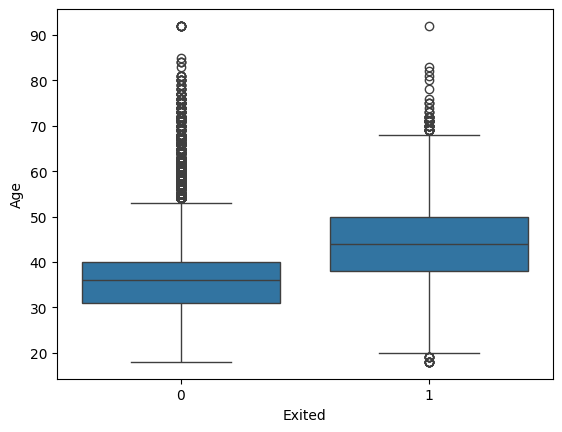

In [ ]:
sns.boxplot(x='Exited', y='Age', data=df_train);

Visualmente, Age é relevante para distinguir se o cliente vai sair ou não.

####Teste Mann-Whitney

In [ ]:
mannwhitneyu_test(df_train[df_train['Exited'] == 0]['Age'], df_train[df_train['Exited'] == 1]['Age'], 0.05)

p-valor: 0.0
Rejeitar H0. Há diferença significativa entre as amostras.


###Tenure

####BoxPlot

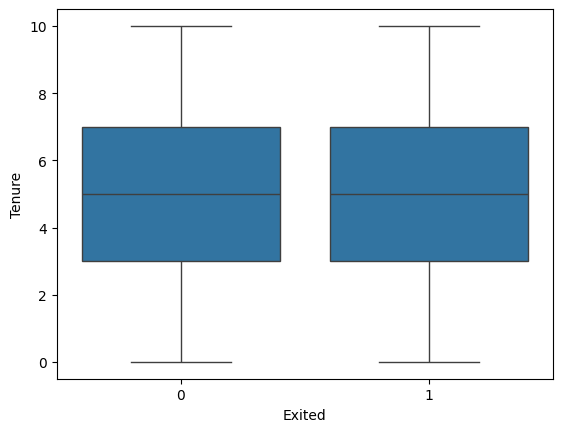

In [ ]:
sns.boxplot(x='Exited', y='Tenure', data=df_train);

Visualmente, Tenure não é relevante para distinguir se o cliente vai sair ou não.

####Teste Mann-Whitney

In [ ]:
mannwhitneyu_test(df_train[df_train['Exited'] == 0]['Tenure'], df_train[df_train['Exited'] == 1]['Tenure'], 0.05)

p-valor: 6.488250129363171e-10
Rejeitar H0. Há diferença significativa entre as amostras.


###Balance

####BoxPlot

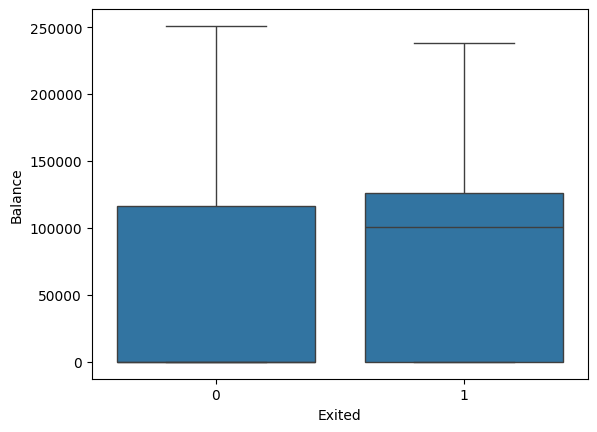

In [ ]:
sns.boxplot(x='Exited', y='Balance', data=df_train);

Visualmente, Age é relevante para distinguir se o cliente vai sair ou não.

####Teste Mann-Whitney

In [ ]:
mannwhitneyu_test(df_train[df_train['Exited'] == 0]['Balance'], df_train[df_train['Exited'] == 1]['Balance'], 0.05)

p-valor: 3.8159330528934654e-257
Rejeitar H0. Há diferença significativa entre as amostras.


###EstimatedSalary

####BoxPlot

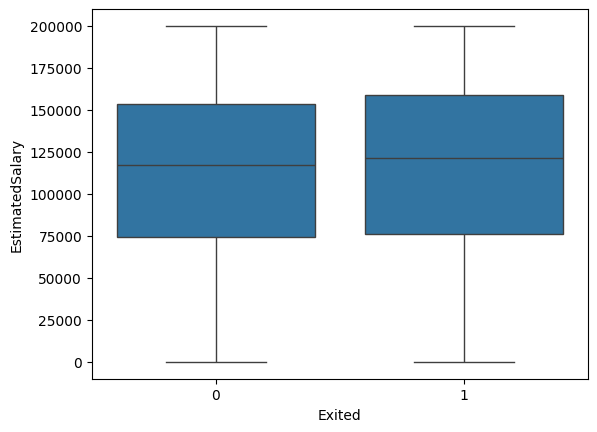

In [ ]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=df_train);

Visualmente, EstimatedSalary não é relevante para distinguir se o cliente vai sair ou não.

####Teste Mann-Whitney

In [ ]:
mannwhitneyu_test(df_train[df_train['Exited'] == 0]['EstimatedSalary'], df_train[df_train['Exited'] == 1]['EstimatedSalary'], 0.05)

p-valor: 2.329003535414211e-10
Rejeitar H0. Há diferença significativa entre as amostras.


###NumOfProducts

####Teste Qui-Quadrado

Realizarei teste Qui-Quadrado para testar a hipótese de quem NumOfProducts e Exited não são independentes.

In [ ]:
df_num_of_prod = df_train[['NumOfProducts', 'Exited']]

In [ ]:
#Tabela bivariada - números absolutos
cross_tab = pd.crosstab(index = df_num_of_prod['NumOfProducts'],
                        columns= df_num_of_prod['Exited'],
                        margins=True
                        )
cross_tab

Exited,0,1,All
NumOfProducts,,,
1,20143,10723,30866
2,31697,2050,33747
3,140,1022,1162
4,20,169,189
All,52000,13964,65964


Dúvidas:

1. Porquê a proporção de pessoas que sairam é maior nas pessoas com três e quatro produtos?

In [ ]:
#Tabela bivariada - proporção
cross_tab_prop = pd.crosstab(index = df_num_of_prod['NumOfProducts'],
                        columns= df_num_of_prod['Exited'],
                        normalize='index',
                        margins=True)

cross_tab_prop

Exited,0,1
NumOfProducts,,
1,0.652595,0.347405
2,0.939254,0.060746
3,0.120482,0.879518
4,0.105820,0.894180
All,0.788309,0.211691


H0: As variáveis NumOfProducts e Exited são independentes

H1: As variáveis NumOfProducts e Exited não são independentes

In [ ]:
from scipy.stats import chi2_contingency, chi2

In [ ]:
stat, p, dof, expected = chi2_contingency(cross_tab)

In [ ]:
print(f'p-value: {p}')

p-value: 0.0


In [ ]:
p <= 0.05

True

Rejeitar H0. Portanto as variáveis não são independentes

###HasCrCard

####Teste Qui-Quadrado

H0: As variáveis HasCrCard e Exited são independentes

H1: As variáveis HasCrCard e Exited não são independentes

In [ ]:
#Tabela bivariada - números absolutos
cross_tab_card = pd.crosstab(index = df_train['HasCrCard'],
                        columns= df_train['Exited'],
                        margins=True
                        )
cross_tab_card

Exited,0,1,All
HasCrCard,,,
0.0,12522,3653,16175
1.0,39478,10311,49789
All,52000,13964,65964


In [ ]:
stat_card, p_card, dof_card, expected_card = chi2_contingency(cross_tab_card)

In [ ]:
p_card

3.610578399316094e-05

###IsActiveMember

####Teste Qui-Quadrado

H0: As variáveis IsActiveMember e Exited são independentes

H1: As variáveis IsActiveMember e Exited não são independentes

In [ ]:
#Tabela bivariada - números absolutos
cross_tab_active = pd.crosstab(index = df_train['IsActiveMember'],
                        columns= df_train['Exited'],
                        margins=True
                        )
cross_tab_active

Exited,0,1,All
IsActiveMember,,,
0.0,23303,9874,33177
1.0,28697,4090,32787
All,52000,13964,65964


In [ ]:
stat_active, p_active, dof_active, expected_active = chi2_contingency(cross_tab_active)

In [ ]:
p_active

0.0

###Geography

####Teste Qui-Quadrado

H0: As variáveis Geography e Exited são independentes

H1: As variáveis Geography e Exited não são independentes

In [ ]:
cross_tab_geo = pd.crosstab(index = df_train['Geography'],
                        columns= df_train['Exited'],
                        margins=True
                        )
cross_tab_geo

Exited,0,1,All
Geography,,,
France,31412,6225,37637
Germany,8570,5314,13884
Spain,12018,2425,14443
All,52000,13964,65964


In [ ]:
stat_geo, p_geo, dof_geo, expected_geo = chi2_contingency(cross_tab_geo)

In [ ]:
p_geo

0.0

In [ ]:
p_geo <= 0.05

True

##Features selecionadas:

In [ ]:
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'IsActiveMember', 'Geography', 'Exited']

In [ ]:
df_train_features = df_train[features]
df_train_features

,CreditScore,Age,Tenure,Balance,EstimatedSalary,NumOfProducts,IsActiveMember,Geography,Exited
49070,748,31.0,5,0.00,73882.49,2,1.0,France,0
77486,654,40.0,1,105683.63,173617.09,1,1.0,Germany,1
142521,648,40.0,7,134944.00,117036.38,1,1.0,France,0
28960,689,52.0,5,0.00,173948.40,2,1.0,Spain,0
99178,636,60.0,4,114370.81,132870.15,3,0.0,France,1
...,...,...,...,...,...,...,...,...,...
28165,483,46.0,5,0.00,176883.42,3,0.0,France,0
63597,693,43.0,4,152341.55,9241.83,1,0.0,France,0
162596,624,41.0,5,0.00,61290.69,1,1.0,Spain,0
38671,542,33.0,1,128940.24,166677.54,1,1.0,Spain,0


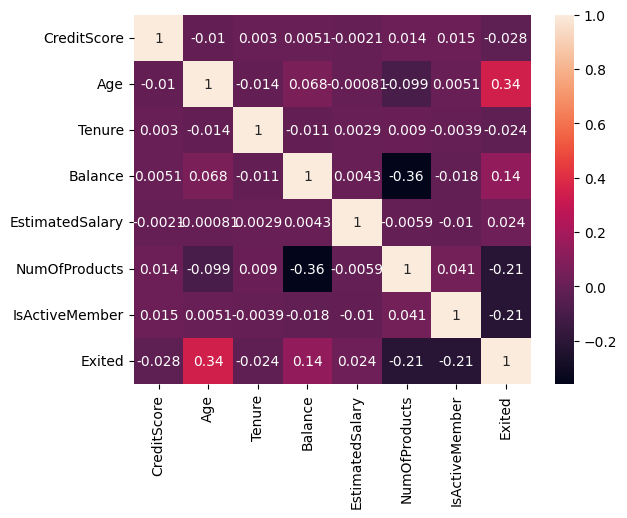

In [ ]:
sns.heatmap(df_train_features.drop(columns=['Geography']).corr(), annot=True);

#Preprocessamento

##OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
#X_test.drop(columns=['Gender'], inplace=True)

In [ ]:
X_train = df_train_features.drop('Exited', axis=1)
y_train = df_train_features['Exited']

In [ ]:
encoder = OneHotEncoder(drop='if_binary', sparse_output=False)

In [ ]:
var_to_transform = ['Geography']

In [ ]:
transformer = make_column_transformer(
    (encoder, var_to_transform),
    remainder='passthrough',
    sparse_threshold=0
)

In [ ]:
#X_train_transformed = transformer.fit_transform(X_train)
#X_train_transformed = pd.DataFrame(X_train_transformed, columns=transformer.get_feature_names_out())
#X_train_transformed

In [ ]:
#X_test_transformed = transformer.transform(X_test)
#X_test_transformed = pd.DataFrame(X_test_transformed, columns=transformer.get_feature_names_out())
#X_test_transformed

##Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
#X_train_transformed_scaled = scaler.fit_transform(X_train_transformed)
#X_train_transformed_scaled

In [ ]:
#X_test_transformed_scaled = scaler.transform(X_test_transformed)
#X_test_transformed_scaled

#LogisticRegression

##Validação Cruzada

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

In [ ]:
lr = LogisticRegression()

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

###Pipeline Over

In [ ]:
pipeline_over_lr = Pipeline([
    ('OneHotEncoder', transformer),
    ('StandardScaler', scaler),
    ('smote', SMOTE(random_state=42)),
    ('LogisticRegression', lr)
])

####Métricas

In [ ]:
def print_metrics(pipeline):
  '''
  Essa função retorna intervalo de confiança, Matriz de Confusão e Curva ROC.
  '''

  from matplotlib import pyplot as plt
  from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict
  from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

  #Intervalo de Confiança:
  cv_results = cross_validate(pipeline, X_train, y_train, cv=skf, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])
  y_pred = cross_val_predict(pipeline, X_train, y_train, cv=skf, method='predict')
  y_pred_proba = cross_val_predict(pipeline, X_train, y_train, cv=skf, method='predict_proba')

  for i in ['test_accuracy', 'test_precision', 'test_recall', 'test_roc_auc']:
    desv = cv_results[i].std()
    media = cv_results[i].mean()
    print(f'Intervalo de confiança {i}: [{media - 2*desv}, {min(media + 2*desv,1)}]')

  #Matriz de Confusão:
  print('\nMatriz de Confusão:')
  disp=ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred))
  disp.plot()
  plt.show()

  #Curva ROC:
  print('\nCurva ROC:')
  y_pred_proba = pd.DataFrame(y_pred_proba)
  y_pred_proba = y_pred_proba.loc[:,1]

  fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
  plt.plot(fpr, tpr)
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall)')
  plt.title(f'Curva ROC {round(roc_auc_score(y_train, y_pred_proba),2)*100}%')
  plt.show()


Intervalo de confiança test_accuracy: [0.741218256810941, 0.762480920358053]
Intervalo de confiança test_precision: [0.43311057022192984, 0.4615014630783069]
Intervalo de confiança test_recall: [0.7170747316350138, 0.7426788274571495]
Intervalo de confiança test_roc_auc: [0.8034451877831431, 0.8216359681189472]

Matriz de Confusão:


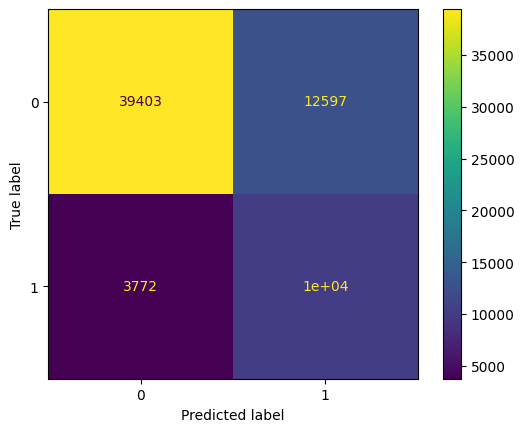


Curva ROC:


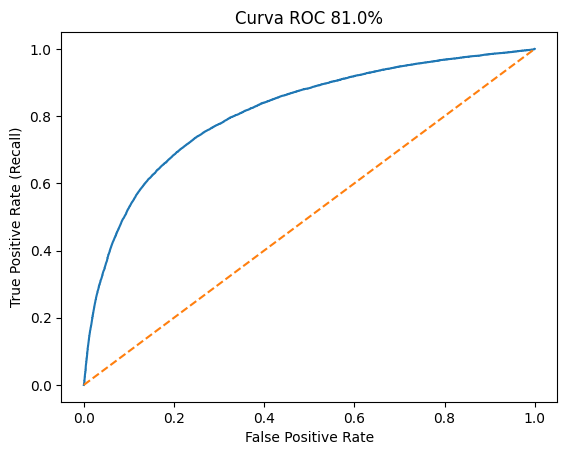

In [ ]:
print_metrics(pipeline_over_lr)

###Pipeline Under

In [ ]:
pipeline_under_lr = Pipeline([
    ('OneHotEncoder', transformer),
    ('StandardScaler', scaler),
    ('NearMiss', NearMiss()),
    ('LogisticRegression', lr)
])

####Métricas

Intervalo de confiança test_accuracy: [0.7005632188303307, 0.7288833811339906]
Intervalo de confiança test_precision: [0.3820272870756318, 0.4145595508784172]
Intervalo de confiança test_recall: [0.6709891318952208, 0.6882204967609467]
Intervalo de confiança test_roc_auc: [0.7503959349939376, 0.7746353339234989]

Matriz de Confusão:


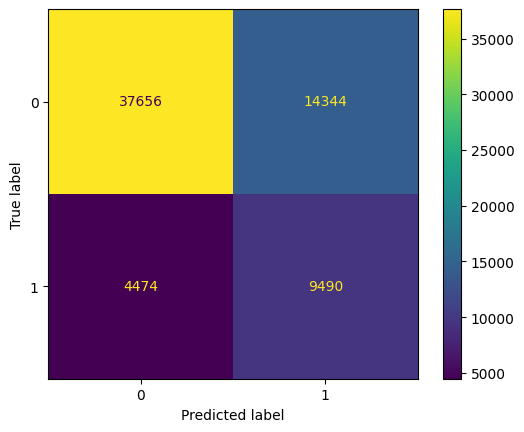


Curva ROC:


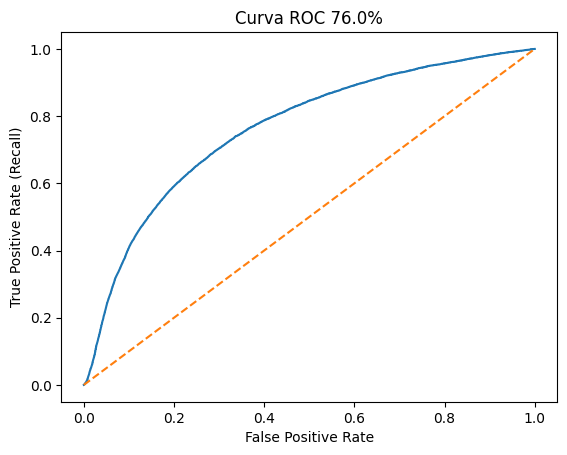

In [ ]:
print_metrics(pipeline_under_lr)

###GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'LogisticRegression__solver': ['lbfgs', 'newton-cholesky', 'sag', 'saga'],
    'LogisticRegression__C': [0.001, 0.01, 0.1, 1, 10, 100],
}

In [ ]:
gs_lr = GridSearchCV(pipeline_under_lr, param_grid, cv=skf, scoring=['roc_auc', 'recall'], refit='roc_auc')

In [ ]:
gs_lr.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       sparse_output=False),
                                                                         ['Geography'])])),
                                       ('StandardScaler', StandardScaler()),
                                       ('NearMiss', NearMiss()),
                                       ('LogisticRegression',
                                        LogisticRegression())]),
             param_grid={'LogisticRegression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'LogisticRegression__solver': ['lbfgs',
                                                        'newton-cholesky',
                                                        'sag', 'saga']},
             refit='roc_auc', scoring=['roc_auc', 'recall'])

In [ ]:
gs_lr.best_params_

{'LogisticRegression__C': 0.01, 'LogisticRegression__solver': 'saga'}

In [ ]:
lr_best = gs_lr.best_estimator_
lr_best

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False),
                                                  ['Geography'])])),
                ('StandardScaler', StandardScaler()), ('NearMiss', NearMiss()),
                ('LogisticRegression',
                 LogisticRegression(C=0.01, solver='saga'))])

####Métricas

Intervalo de confiança test_accuracy: [0.7005919436984078, 0.7286424179089959]
Intervalo de confiança test_precision: [0.3821876839529507, 0.4140679519445292]
Intervalo de confiança test_recall: [0.6716277154133045, 0.6867223656838305]
Intervalo de confiança test_roc_auc: [0.7504673545925451, 0.774785324748799]

Matriz de Confusão:


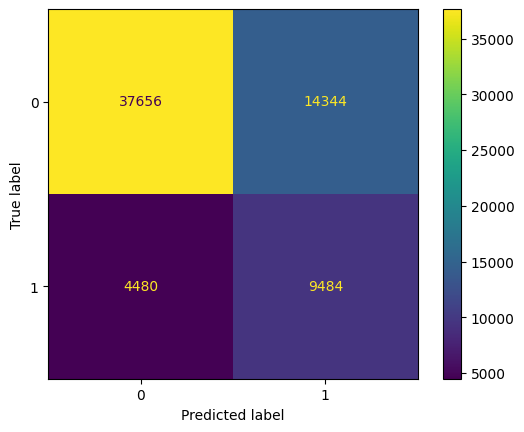


Curva ROC:


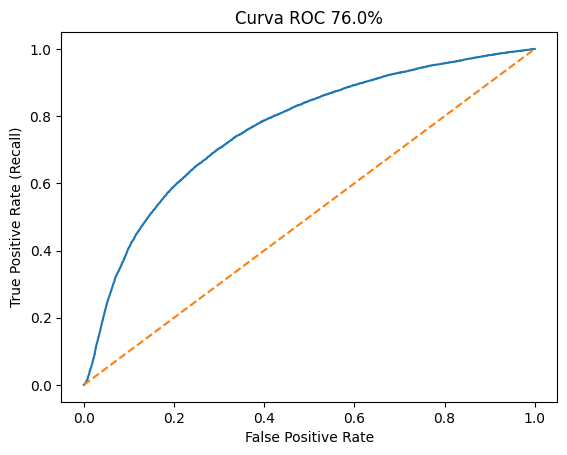

In [ ]:
print_metrics(lr_best)

#RandomForest

##Validação Cruzada

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

###Pipeline Over

In [ ]:
pipeline_over_rf = Pipeline([
    ('OneHotEncoder', transformer),
    ('StandardScaler', scaler),
    ('smote', SMOTE(random_state=42)),
    ('RandomForest', rf)
])

####Métricas

Intervalo de confiança test_accuracy: [0.8369582219460143, 0.8464448906901636]
Intervalo de confiança test_precision: [0.6148865124776655, 0.6384670189369726]
Intervalo de confiança test_recall: [0.6092500251405761, 0.6386726879048292]
Intervalo de confiança test_roc_auc: [0.8575950452660563, 0.8675724049193587]

Matriz de Confusão:


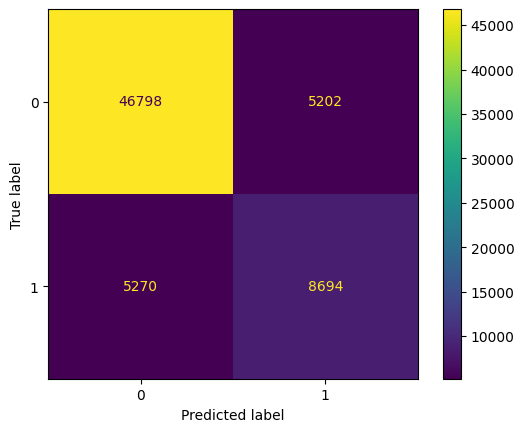


Curva ROC:


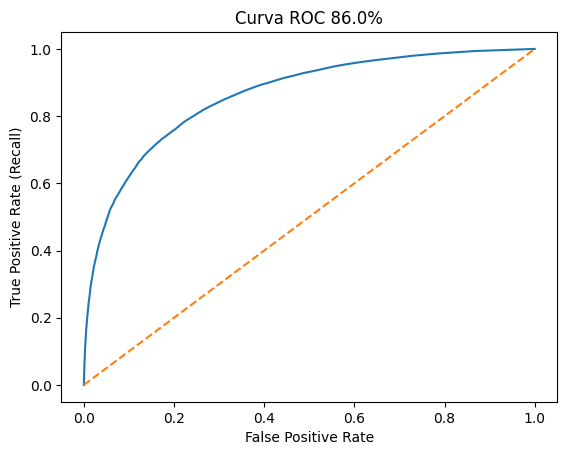

In [ ]:
print_metrics(pipeline_over_rf)

###Pipeline Under

In [ ]:
pipeline_under_rf = Pipeline([
    ('OneHotEncoder', transformer),
    ('StandardScaler', scaler),
    ('NearMiss', NearMiss()),
    ('RandomForest', rf)
])

####Métricas

Intervalo de confiança test_accuracy: [0.5593485113527858, 0.5828197861764046]
Intervalo de confiança test_precision: [0.2953122711562484, 0.30737231135929227]
Intervalo de confiança test_recall: [0.7635252322550086, 0.7926199916315602]
Intervalo de confiança test_roc_auc: [0.7060709379920479, 0.7233868797172139]

Matriz de Confusão:


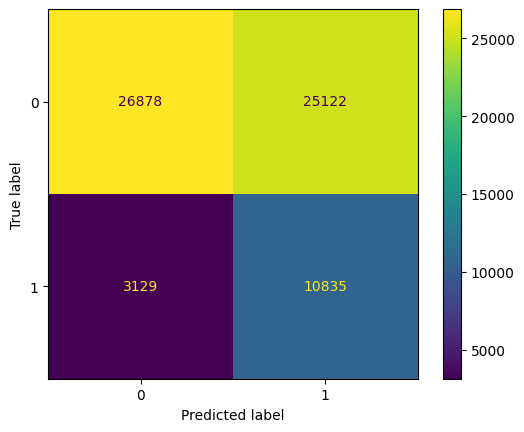


Curva ROC:


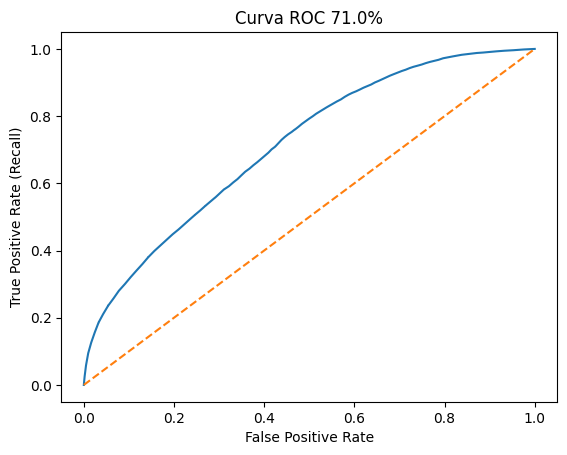

In [ ]:
print_metrics(pipeline_under_rf)

###GridSearch

In [ ]:
param_grid_rf = {
    'RandomForest__n_estimators': [100, 150, 200],
    'RandomForest__criterion': ['gini', 'entropy', 'log_loss'],
}

In [ ]:
gs_rf = GridSearchCV(pipeline_under_rf, param_grid_rf, cv=skf, scoring=['roc_auc', 'recall'], refit='roc_auc')

In [ ]:
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       sparse_output=False),
                                                                         ['Geography'])])),
                                       ('StandardScaler', StandardScaler()),
                                       ('NearMiss', NearMiss()),
                                       ('RandomForest',
                                        RandomForestClassifier())]),
             param_grid={'RandomForest__criterion': ['gini', 'entropy',
                                                     'log_loss'],
                         'RandomForest__n_estimators': [100, 150, 200]},
             refit='roc_auc', scoring=['roc_auc', 'recall'])

In [ ]:
gs_rf.best_params_

{'RandomForest__criterion': 'entropy', 'RandomForest__n_estimators': 200}

In [ ]:
rf_best = gs_rf.best_estimator_
rf_best

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False),
                                                  ['Geography'])])),
                ('StandardScaler', StandardScaler()), ('NearMiss', NearMiss()),
                ('RandomForest',
                 RandomForestClassifier(criterion='entropy',
                                        n_estimators=200))])

####Métricas

Intervalo de confiança test_accuracy: [0.563405270968785, 0.5883137526216969]
Intervalo de confiança test_precision: [0.29682136016888805, 0.310088910856103]
Intervalo de confiança test_recall: [0.7635867126836898, 0.7853969827398876]
Intervalo de confiança test_roc_auc: [0.7060273586401393, 0.7252418992956255]

Matriz de Confusão:


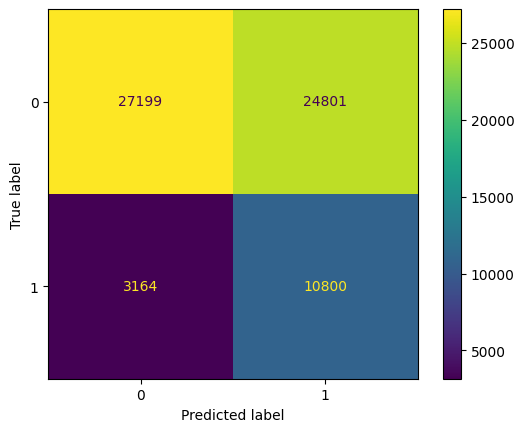


Curva ROC:


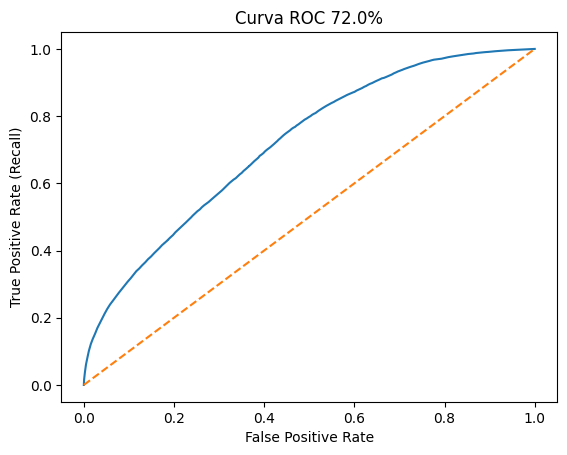

In [ ]:
print_metrics(rf_best)

#KNeighborsClassifier

##Validação Cruzada

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

###Pipeline Over

In [ ]:
pipeline_over_knn = Pipeline([
    ('OneHotEncoder', transformer),
    ('StandardScaler', scaler),
    ('smote', SMOTE(random_state=42)),
    ('KNeighborsClassifier', knn)
])

####Métricas

Intervalo de confiança test_accuracy: [0.7629263815521181, 0.7712741452446923]
Intervalo de confiança test_precision: [0.46135343975398385, 0.47379163566418775]
Intervalo de confiança test_recall: [0.7105176941250909, 0.7337674456584654]
Intervalo de confiança test_roc_auc: [0.8020908816936093, 0.8163074714738584]

Matriz de Confusão:


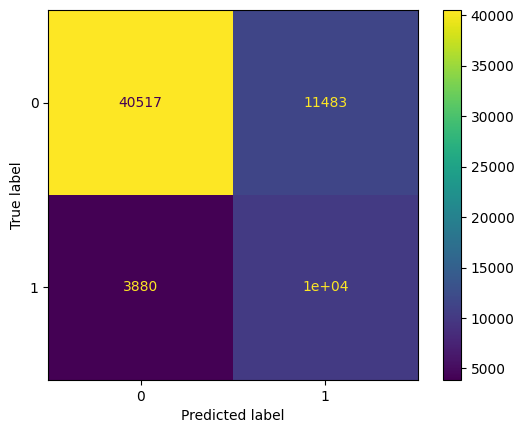


Curva ROC:


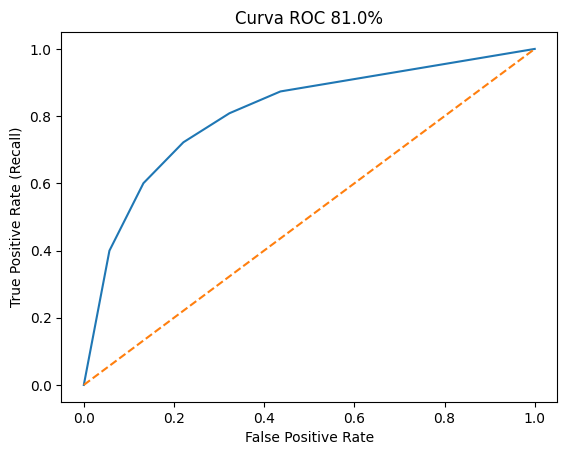

In [ ]:
print_metrics(pipeline_over_knn)

###Pipeline Under



In [ ]:
pipeline_under_knn = Pipeline([
    ('OneHotEncoder', transformer),
    ('StandardScaler', scaler),
    ('NearMiss', NearMiss()),
    ('KNeighborsClassifier', knn)
])

cv_results_under_knn = cross_validate(pipeline_under_knn, X_train, y_train, cv=skf, scoring=['recall', 'precision', 'roc_auc'])
cv_results_under_knn

{'fit_time': array([1.45918369, 1.55313373, 1.53093624, 1.57954502, 1.65946674]),
 'score_time': array([2.65521407, 3.90439868, 2.57876873, 2.50260472, 3.59234428]),
 'test_recall': array([0.70175439, 0.71142141, 0.70676692, 0.71177945, 0.71024355]),
 'test_precision': array([0.33688553, 0.3433558 , 0.329     , 0.34158076, 0.3383959 ]),
 'test_roc_auc': array([0.70962871, 0.71906161, 0.70431864, 0.72145363, 0.72040977])}

####Métricas

Intervalo de confiança test_accuracy: [0.6318010772669421, 0.6567502691961219]
Intervalo de confiança test_precision: [0.3278924018217204, 0.34779479241845923]
Intervalo de confiança test_recall: [0.7008682939802625, 0.7159179922428679]
Intervalo de confiança test_roc_auc: [0.7013994784662797, 0.7285494703017997]

Matriz de Confusão:


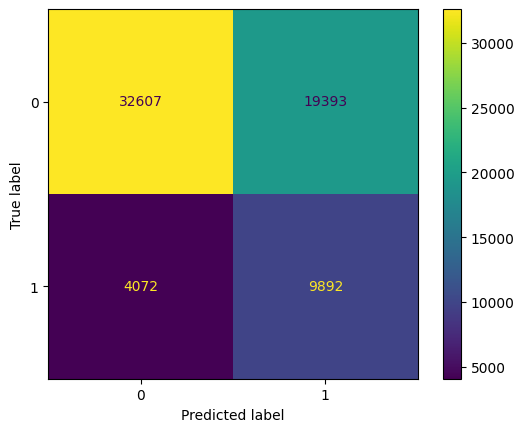


Curva ROC:


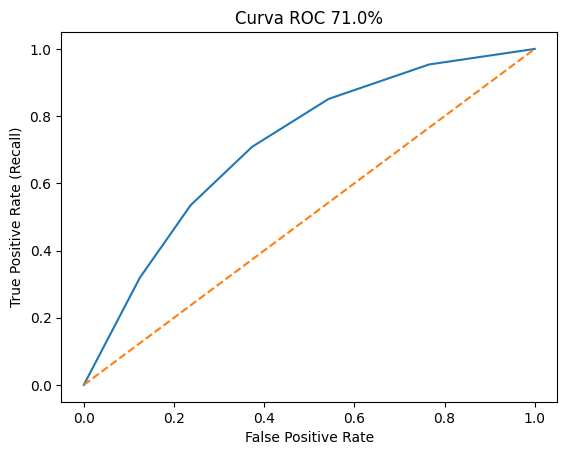

In [ ]:
print_metrics(pipeline_under_knn)

###GridSearch

In [ ]:
param_grid_knn = {
    'KNeighborsClassifier__n_neighbors': [5, 7, 9],
    'KNeighborsClassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

In [ ]:
gs_knn = GridSearchCV(pipeline_under_knn, param_grid_knn, cv=skf, scoring=['roc_auc', 'recall'], refit='roc_auc')

In [ ]:
gs_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       sparse_output=False),
                                                                         ['Geography'])])),
                                       ('StandardScaler', StandardScaler()),
                                       ('NearMiss', NearMiss()),
                                       ('KNeighborsClassifier',
                                        KNeighborsClassifier())]),
             param_grid={'KNeighborsClassifier__algorithm': ['auto',
                                                             'ball_tree',
                                                             'kd_tree',
                                                             'brute'],
                         'KNeighborsClassifier__n_neighbors': [5, 7, 9]},
             refit='roc_auc', scoring=['roc_auc', 'recall'])

####Métricas

Intervalo de confiança test_accuracy: [0.6563272159863001, 0.6827971505978316]
Intervalo de confiança test_precision: [0.34573516066701737, 0.37050809872979007]
Intervalo de confiança test_recall: [0.6952665081062889, 0.719658801483691]
Intervalo de confiança test_roc_auc: [0.7245768566226979, 0.7563654061077135]

Matriz de Confusão:


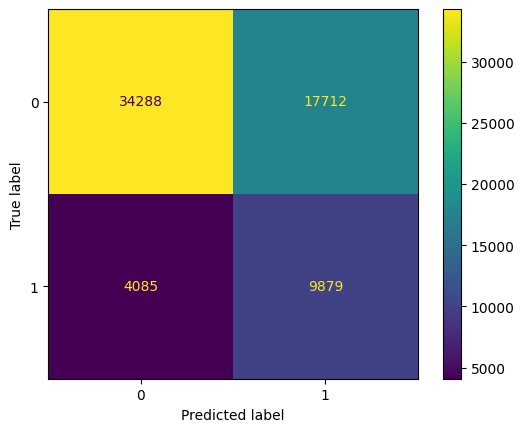


Curva ROC:


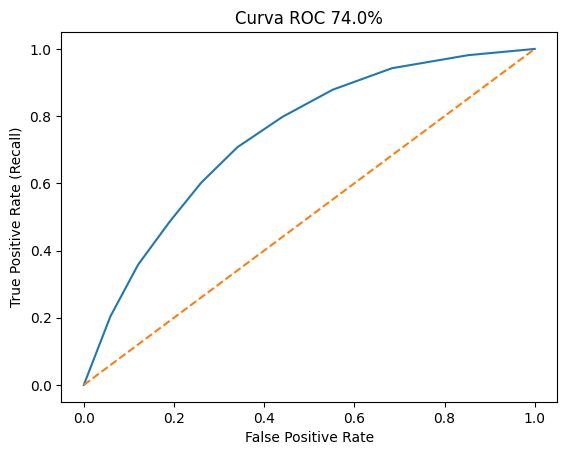

In [ ]:
print_metrics(gs_knn.best_estimator_)

#CatBoosting

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat = CatBoostClassifier()

##Validação Cruzada

###Pipeline Over

In [ ]:
param_cat = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1, 0.01 , 0.001],
    'depth': [2, 4, 6],
}

In [ ]:
pipeline_over_cat = Pipeline([
    ('OneHotEncoder', transformer),
    ('StandardScaler', scaler),
    ('smote', SMOTE(random_state=42)),
    ('CatBoostClassifier', cat)
])

####Métricas

Streaming output truncated to the last 5000 lines.
10:	learn: 0.4719670	total: 255ms	remaining: 22.9s
11:	learn: 0.4646911	total: 275ms	remaining: 22.7s
12:	learn: 0.4583954	total: 296ms	remaining: 22.5s
13:	learn: 0.4531906	total: 317ms	remaining: 22.3s
14:	learn: 0.4477709	total: 339ms	remaining: 22.3s
15:	learn: 0.4425322	total: 360ms	remaining: 22.1s
16:	learn: 0.4386712	total: 380ms	remaining: 22s
17:	learn: 0.4357612	total: 398ms	remaining: 21.7s
18:	learn: 0.4315605	total: 427ms	remaining: 22s
19:	learn: 0.4236793	total: 454ms	remaining: 22.2s
20:	learn: 0.4203645	total: 474ms	remaining: 22.1s
21:	learn: 0.4173602	total: 495ms	remaining: 22s
22:	learn: 0.4150216	total: 515ms	remaining: 21.9s
23:	learn: 0.4114860	total: 535ms	remaining: 21.8s
24:	learn: 0.4101837	total: 556ms	remaining: 21.7s
25:	learn: 0.4075388	total: 577ms	remaining: 21.6s
26:	learn: 0.4038798	total: 597ms	remaining: 21.5s
27:	learn: 0.4019054	total: 617ms	remaining: 21.4s
28:	learn: 0.3971267	total: 645ms	rem

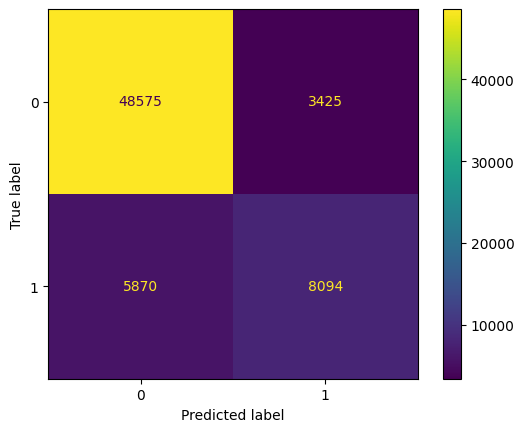


Curva ROC:


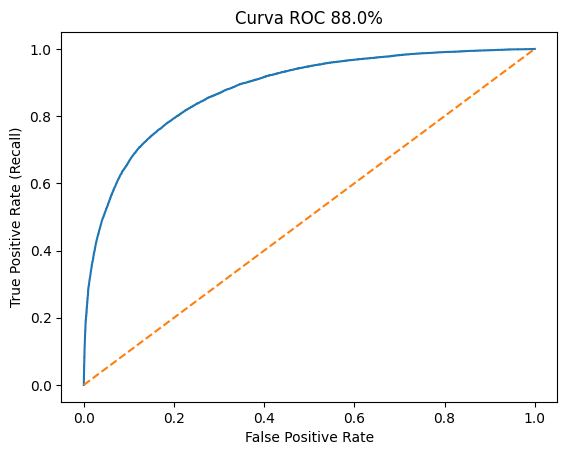

In [ ]:
print_metrics(pipeline_over_cat)

###Pipeline Under

In [ ]:
pipeline_over_cat = Pipeline([
    ('OneHotEncoder', transformer),
    ('StandardScaler', scaler),
    ('NearMiss', NearMiss()),
    ('CatBoostClassifier', cat)
])

####Métricas

Streaming output truncated to the last 5000 lines.
10:	learn: 0.5703224	total: 77.8ms	remaining: 7s
11:	learn: 0.5635703	total: 84.7ms	remaining: 6.97s
12:	learn: 0.5576654	total: 92.2ms	remaining: 7s
13:	learn: 0.5521519	total: 99.7ms	remaining: 7.02s
14:	learn: 0.5479384	total: 107ms	remaining: 7.02s
15:	learn: 0.5433228	total: 114ms	remaining: 7.01s
16:	learn: 0.5404845	total: 121ms	remaining: 7.02s
17:	learn: 0.5364030	total: 129ms	remaining: 7.03s
18:	learn: 0.5328583	total: 136ms	remaining: 7.03s
19:	learn: 0.5296428	total: 144ms	remaining: 7.04s
20:	learn: 0.5265948	total: 151ms	remaining: 7.03s
21:	learn: 0.5231121	total: 157ms	remaining: 7s
22:	learn: 0.5206889	total: 166ms	remaining: 7.04s
23:	learn: 0.5181254	total: 173ms	remaining: 7.04s
24:	learn: 0.5155807	total: 181ms	remaining: 7.05s
25:	learn: 0.5133240	total: 188ms	remaining: 7.05s
26:	learn: 0.5111454	total: 202ms	remaining: 7.29s
27:	learn: 0.5092178	total: 211ms	remaining: 7.32s
28:	learn: 0.5063821	total: 218ms	re

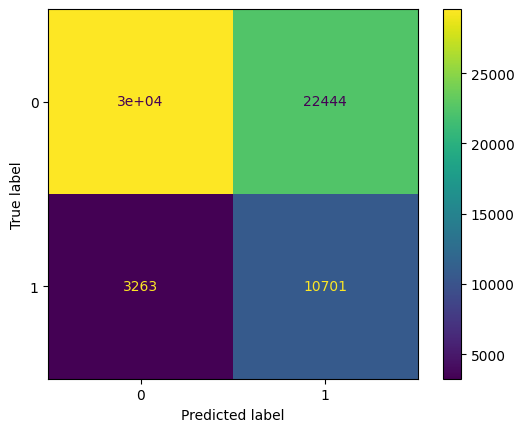


Curva ROC:


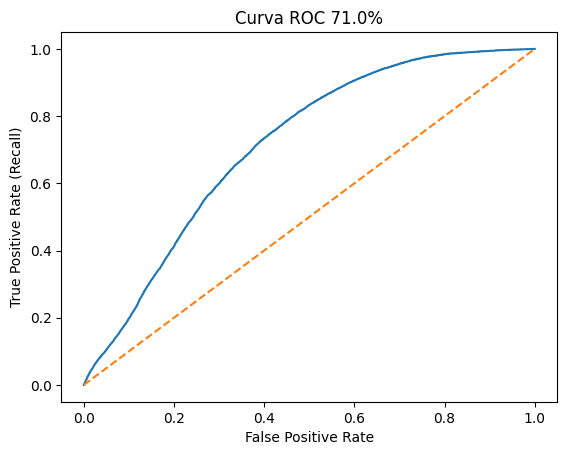

In [ ]:
print_metrics(pipeline_over_cat)

#ExtraTreeClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
extratree = ExtraTreesClassifier()

In [ ]:
param_grid_extra = {
    'ExtraTreesClassifier__criterion': ['gini', 'entropy', 'log_loss'],
    'ExtraTreesClassifier__n_estimators': [10, 20],
    'ExtraTreesClassifier__max_features': [0.70, 0.9],
    'ExtraTreesClassifier__max_depth': [10, 20]
}

###Validação Cruzada

####Pipeline Over

In [ ]:
pipeline_over_extra = Pipeline([
    ('OneHotEncoder', transformer),
    ('StandardScaler', scaler),
    ('smote', SMOTE(random_state=42)),
    ('ExtraTreesClassifier', extratree)
])

In [ ]:
gs_extra = GridSearchCV(pipeline_over_extra, param_grid_extra, cv=5, scoring=['accuracy', 'roc_auc'], refit='accuracy')

In [ ]:
gs_extra.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       sparse_output=False),
                                                                         ['Geography'])])),
                                       ('StandardScaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('ExtraTreesClassifier',
                                        ExtraTreesClassifier())]),
             param_grid={'ExtraTreesClassifier__criterion': ['gini', 'entropy',
                                                             'log_loss'],
                         'ExtraTreesClassifier__max_depth': [10, 20],
                         'ExtraTreesClassifier__max_features': [0.7, 0.9],
                         'ExtraTreesClassifier__n_estimators': [10, 20]},
             refit='accuracy', scoring=['accuracy', 'roc_auc'])

####Métricas

Intervalo de confiança test_accuracy: [0.8344763136705277, 0.8450761940291055]
Intervalo de confiança test_precision: [0.6029914806008783, 0.6296275698668834]
Intervalo de confiança test_recall: [0.6292397950883638, 0.659502835126141]
Intervalo de confiança test_roc_auc: [0.8561581998195829, 0.8677596717479736]

Matriz de Confusão:


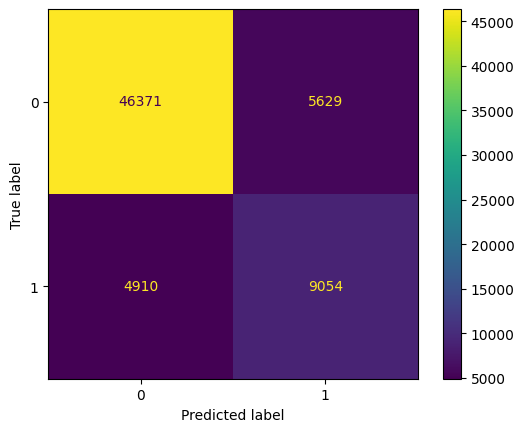


Curva ROC:


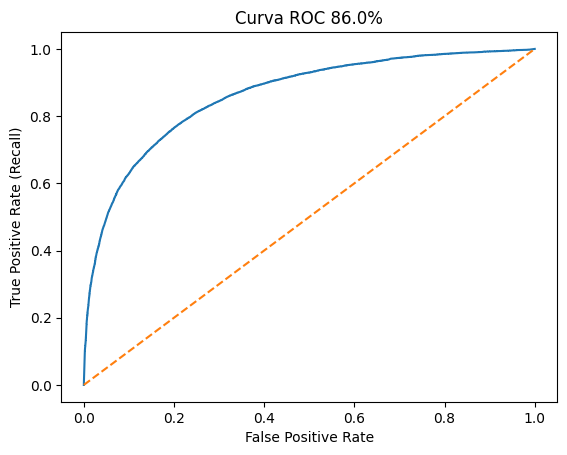

In [ ]:
print_metrics(gs_extra.best_estimator_)

#Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
votacao_hard = VotingClassifier(estimators=[
    ('RandomForestOver', gs_rf.best_estimator_),
    ('ExtraTreesClassifier', pipeline_over_extra),
    ('knn', gs_knn.best_estimator_)
],
voting='hard')

In [ ]:
y_pred = cross_val_predict(votacao_hard, X_train, y_train, cv=skf, method='predict')

<Axes: >

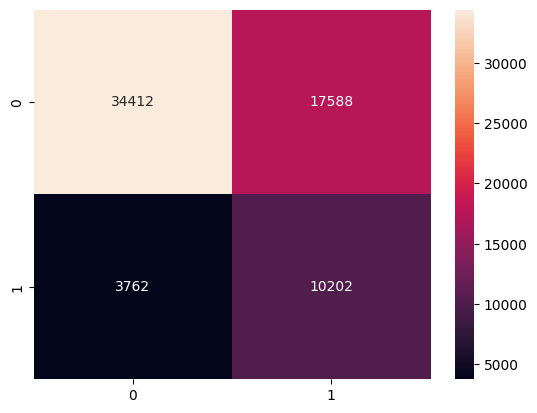

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d')

In [ ]:
roc_auc_score(y_train, y_pred)

0.6961810920388691

#Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
modelos_base = {
    'RandomForest': gs_rf.best_estimator_,
    'ExtraTreeClassifier': pipeline_over_extra,
    'KNeighbors': gs_knn.best_estimator_
}

In [ ]:
modelo_meta = lr_best

In [ ]:
stacking = StackingClassifier(estimators = list(modelos_base.items()), final_estimator = modelo_meta)

In [ ]:
y_pred_stacking = cross_val_predict(stacking, X_train, y_train, cv=skf, method='predict')

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d')

In [ ]:
roc_auc_score(y_train, y_pred)